In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yahooFin  
import cufflinks as cf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
import yfinance as yf

In [3]:
stock_symbol = 'TATAMOTORS.NS'
time = '5y'
df = yf.download(tickers=stock_symbol,period=time,interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-02-02  537.599976  537.599976  526.799988  531.500000  531.500000   
2017-02-03  531.900024  531.900024  519.500000  522.599976  522.599976   
2017-02-06  527.900024  531.450012  523.200012  525.849976  525.849976   
2017-02-07  524.799988  524.799988  502.000000  506.799988  506.799988   
2017-02-08  512.349976  514.950012  506.299988  513.049988  513.049988   

             Volume  
Date                 
2017-02-02  6579801  
2017-02-03  5298261  
2017-02-06  3642527  
2017-02-07  7987282  
2017-02-08  5975054

In [5]:
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-27  480.750000  502.700012  476.600006  494.399994  494.399994   
2022-01-28  500.500000  509.350006  495.299988  497.299988  497.299988   
2022-01-31  505.000000  520.000000  498.200012  517.750000  517.750000   
2022-02-01  508.000000  514.750000  493.000000  504.299988  504.299988   
2022-02-02  508.600006  514.450012  507.549988  508.850006  508.850006   

              Volume  
Date                  
2022-01-27  26676094  
2022-01-28  21784640  
2022-01-31  27306578  
2022-02-01  48030231  
2022-02-02  10120710

In [6]:
df1 = df.reset_index()

In [7]:
df1.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-02-02  537.599976  537.599976  526.799988  531.500000  531.500000   
1 2017-02-03  531.900024  531.900024  519.500000  522.599976  522.599976   
2 2017-02-06  527.900024  531.450012  523.200012  525.849976  525.849976   
3 2017-02-07  524.799988  524.799988  502.000000  506.799988  506.799988   
4 2017-02-08  512.349976  514.950012  506.299988  513.049988  513.049988   

    Volume  
0  6579801  
1  5298261  
2  3642527  
3  7987282  
4  5975054

In [8]:
df1 = df1.drop(['Date', 'Adj Close'], axis = 1)
df1.head()

Open        High         Low       Close   Volume
0  537.599976  537.599976  526.799988  531.500000  6579801
1  531.900024  531.900024  519.500000  522.599976  5298261
2  527.900024  531.450012  523.200012  525.849976  3642527
3  524.799988  524.799988  502.000000  506.799988  7987282
4  512.349976  514.950012  506.299988  513.049988  5975054

In [9]:
import plotly.express as px
import plotly.graph_objects as go

In [10]:
import plotly.graph_objects as go

candlestick = go.Candlestick(x=df1.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close'])

fig = go.Figure(data=[candlestick])

fig.show()

In [11]:
import yahoo_fin.stock_info as si
data1 = si.get_quote_table(stock_symbol)

In [12]:
data1

{'1y Target Est': nan,
 '52 Week Range': '268.45 - 536.70',
 'Ask': '508.85 x 0',
 'Avg. Volume': 23857290.0,
 'Beta (5Y Monthly)': 2.09,
 'Bid': '508.80 x 0',
 "Day's Range": '507.55 - 514.45',
 'EPS (TTM)': -36.99,
 'Earnings Date': nan,
 'Ex-Dividend Date': 'Jul 18, 2016',
 'Forward Dividend & Yield': 'N/A (N/A)',
 'Market Cap': '1.82T',
 'Open': 508.6,
 'PE Ratio (TTM)': nan,
 'Previous Close': 504.3,
 'Quote Price': 508.95001220703125,
 'Volume': 10122255.0}

In [13]:
eps = data1["EPS (TTM)"]
marketcap = data1["Market Cap"]
pe = data1["PE Ratio (TTM)"]
volume = data1["Volume"]


In [14]:
print(eps)

-36.99


In [15]:
print(marketcap)

1.82T


In [16]:
print(pe)

nan


In [17]:
print(volume)

10122255.0


In [18]:
company = yf.Ticker(stock_symbol)
company.major_holders

0                                      1
0   0.79%        % of Shares Held by All Insider
1  17.35%       % of Shares Held by Institutions
2  17.49%        % of Float Held by Institutions
3     163  Number of Institutions Holding Shares

In [19]:
company.institutional_holders

Holder    Shares Date Reported  \
0  Vanguard International Stock Index-Total Intl ...  18507161    2021-10-31   
1  Vanguard International Stock Index-Emerging Ma...  16673205    2021-10-31   
2             iShares Core MSCI Emerging Markets ETF  14613084    2021-10-31   
3  Fidelity Series Emerging Markets Opportunities...  12932030    2021-11-30   
4                             iShares MSCI India ETF  10915565    2021-11-30   
5  DFA Investment Dimensions-DFA Emerging Mkts Value  10754335    2021-10-31   
6         DFA Emerging Markets Core Equity Portfolio   6741020    2021-10-31   
7                  iShares MSCI Emerging Markets ETF   6252850    2021-11-30   
8  PIMCO Equity Series-PIMCO RAE Emerging Markets Fd   4587187    2021-09-30   
9  Schwab Strategic Tr-Schwab Fundamental Emg Mkt...   4500710    2021-11-30   

    % Out       Value  
0  0.0056  8951913775  
1  0.0050  8064829258  
2  0.0044  7068348730  
3  0.0039  5930628958  
4  0.0033  5005878109  
5  0.0032  5201871839  
6  0.0020  3260631374  
7  0.0019  2867557010  
8  0.0014  1529138786  
9  0.0014  2064025606

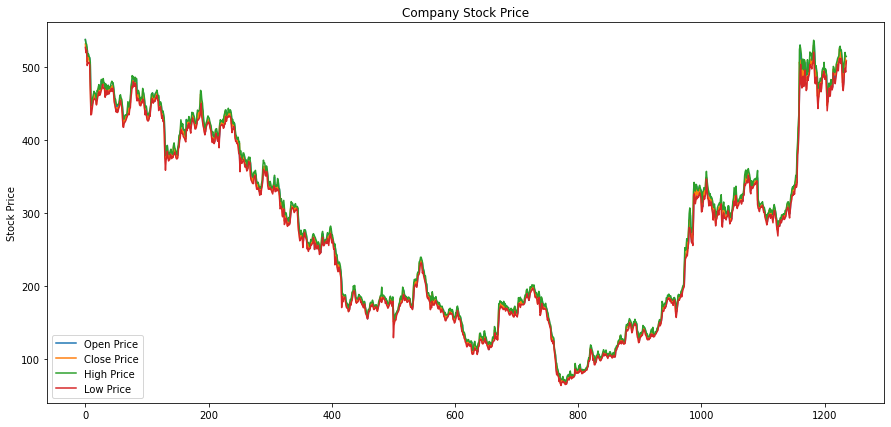

In [20]:
df1['Open'].plot(label = 'Open Price',figsize=(15,7))
df1['Close'].plot(label = 'Close Price')
df1['High'].plot(label = 'High Price')
df1['Low'].plot(label = 'Low Price')
plt.legend()
plt.title('Company Stock Price')
plt.ylabel('Stock Price')
plt.show()

Text(0.5, 1.0, 'Volume Traded')

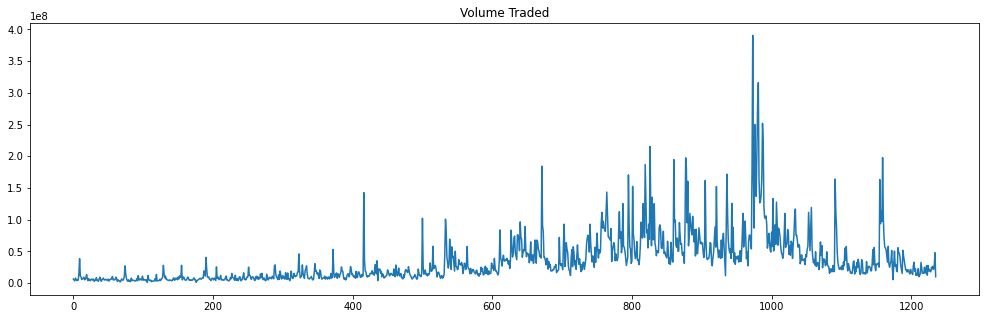

In [21]:
df1['Volume'].plot(figsize=(17,5))
plt.title('Volume Traded')

In [22]:
daily_returns = df['Adj Close'].pct_change()

In [23]:
print(daily_returns.head())

Date
2017-02-02         NaN
2017-02-03   -0.016745
2017-02-06    0.006219
2017-02-07   -0.036227
2017-02-08    0.012332
Name: Adj Close, dtype: float64


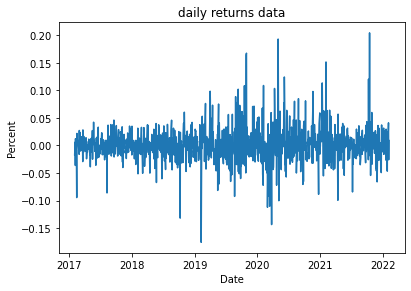

In [24]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("daily returns data")
plt.show()

In [25]:
cum_returns = (daily_returns + 1).cumprod()

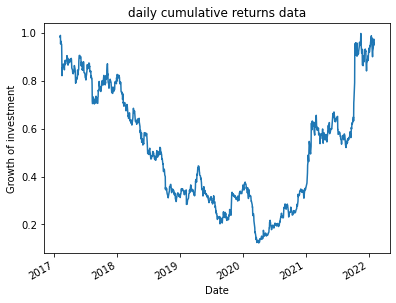

In [26]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of investment")
ax1.set_title("daily cumulative returns data")
plt.show()

In [27]:
information = yahooFin.Ticker(stock_symbol)  

In [28]:
string_logo = '<img src=%s>' % information.info['logo_url']

In [29]:
string_logo

'<img src=https://logo.clearbit.com/tatamotors.com>'

In [30]:
string_name = information.info['longName']

In [31]:
print(string_name)

Tata Motors Limited


In [32]:
string_summary = information.info['longBusinessSummary']

In [33]:
print(string_summary)

Tata Motors Limited designs, develops, manufactures, and sells a range of automotive vehicles. The company offers passenger cars; utility vehicles; intermediate and light commercial vehicles; small, medium, and heavy commercial vehicles; defense vehicles; pickups, wingers, buses, and trucks; and electric vehicles, as well as related spare parts and accessories. It also manufactures engines for industrial and marine applications; aggregates comprising axles and transmissions for commercial vehicles; and factory automation equipment, as well as provides information technology and vehicle financing services. The company offers its products under the Tata, Daewoo, Fiat, Jaguar, and Land Rover brands. It operates in India, China, the United States, the United Kingdom, rest of Europe, and internationally. The company was formerly known as Tata Engineering and Locomotive Company Limited and changed its name to Tata Motors Limited in July 2003. Tata Motors Limited was incorporated in 1945 and 

In [34]:
qf=cf.QuantFig(df,title='First Quant Figure',legend='top',name='GS')
qf.add_bollinger_bands()
fig = qf.iplot(asFigure=True)

In [35]:
fig.show()

prediction

Close

In [36]:
close = df[['Close']]

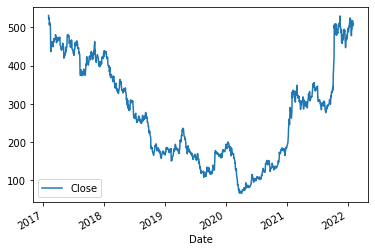

In [37]:
close.plot()

In [38]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-02-02  537.599976  537.599976  526.799988  531.500000  531.500000   
2017-02-03  531.900024  531.900024  519.500000  522.599976  522.599976   
2017-02-06  527.900024  531.450012  523.200012  525.849976  525.849976   
2017-02-07  524.799988  524.799988  502.000000  506.799988  506.799988   
2017-02-08  512.349976  514.950012  506.299988  513.049988  513.049988   
...                ...         ...         ...         ...         ...   
2022-01-27  480.750000  502.700012  476.600006  494.399994  494.399994   
2022-01-28  500.500000  509.350006  495.299988  497.299988  497.299988   
2022-01-31  505.000000  520.000000  498.200012  517.750000  517.750000   
2022-02-01  508.000000  514.750000  493.000000  504.299988  504.299988   
2022-02-02  508.600006  514.450012  507.549988  508.850006  508.850006   

              Volume  
Date                  
2017-02-02   6579801  
2017-02-03   5298261  
2017-02-06   3642527  
2017-02-07   7987282  
2017-02-08   5975054  
...              ...  
2022-01-27  26676094  
2022-01-28  21784640  
2022-01-31  27306578  
2022-02-01  48030231  
2022-02-02  10120710  

[1236 rows x 6 columns]

In [39]:
ds = close.values

In [40]:
ds

array([[531.5       ],
       [522.59997559],
       [525.84997559],
       ...,
       [517.75      ],
       [504.29998779],
       [508.8500061 ]])

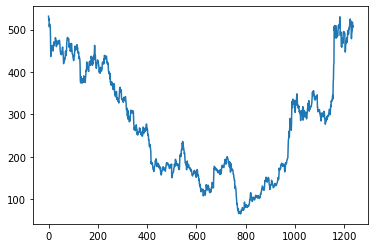

In [41]:
plt.plot(ds)

In [42]:
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [43]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2017-02-02           NaN
2017-02-03           NaN
2017-02-06           NaN
2017-02-07           NaN
2017-02-08           NaN
                 ...    
2022-01-27    446.933502
2022-01-28    448.951002
2022-01-31    451.154002
2022-02-01    453.251002
2022-02-02    455.387002
Name: Close, Length: 1236, dtype: float64

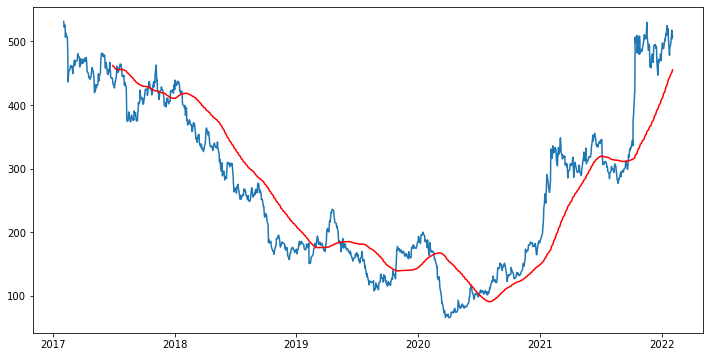

In [44]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [45]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2017-02-02           NaN
2017-02-03           NaN
2017-02-06           NaN
2017-02-07           NaN
2017-02-08           NaN
                 ...    
2022-01-27    379.365501
2022-01-28    380.261001
2022-01-31    381.417001
2022-02-01    382.424251
2022-02-02    383.451001
Name: Close, Length: 1236, dtype: float64

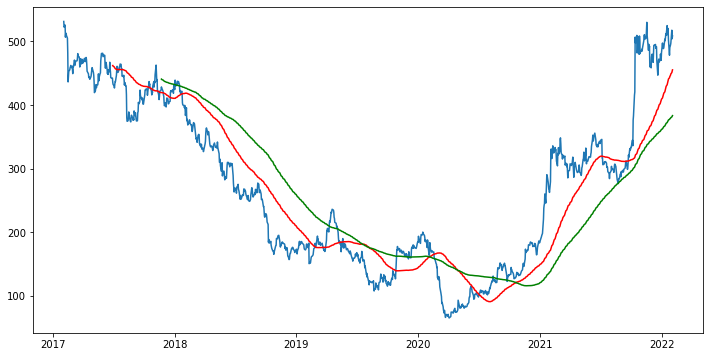

In [46]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [47]:
df.shape

(1236, 6)

In [48]:
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [49]:
train_size,test_size

(865, 371)

In [50]:
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [51]:
len(ds_train),len(ds_test)

(865, 371)

In [52]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [53]:
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [54]:
X_train.shape,y_train.shape

((764, 100), (764,))

In [55]:
X_test.shape, y_test.shape

((270, 100), (270,))

In [56]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [57]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [58]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
  
model.fit(X_train, y_train, validation_data =(X_test,y_test), epochs=100, batch_size=128, callbacks =[earlystopping])


Epoch 1/100
6/6 [==============================] - 14s 860ms/step - loss: 0.0741 - accuracy: 0.0013 - val_loss: 0.0264 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 2s 390ms/step - loss: 0.0184 - accuracy: 0.0013 - val_loss: 0.0455 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 2s 368ms/step - loss: 0.0134 - accuracy: 0.0013 - val_loss: 0.0212 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 2s 362ms/step - loss: 0.0057 - accuracy: 0.0013 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 2s 369ms/step - loss: 0.0038 - accuracy: 0.0013 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 2s 359ms/step - loss: 0.0031 - accuracy: 0.0013 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 2s 372ms/step - loss: 0.0023 - accuracy: 0.0013 - val_loss: 0.0076 - val_accur

In [59]:
model.save('keras_model.h5')

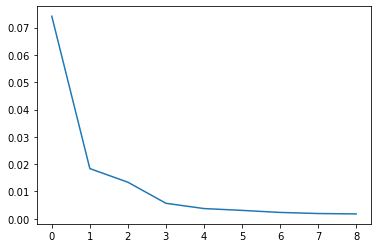

In [60]:
loss = model.history.history['loss']
plt.plot(loss)

In [61]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [62]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

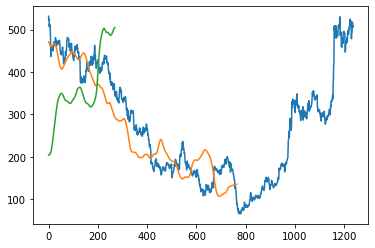

In [63]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [64]:
type(train_predict)

numpy.ndarray

In [65]:
test = np.vstack((train_predict,test_predict))

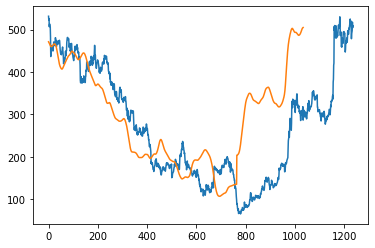

In [66]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [67]:
len(ds_test)

371

In [68]:
fut_inp = ds_test[(len(ds_test)-100):]

In [69]:
fut_inp = fut_inp.reshape(1,-1)

In [70]:
tmp_inp = list(fut_inp)

In [71]:
fut_inp.shape

(1, 100)

In [72]:
tmp_inp = tmp_inp[0].tolist()

In [73]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp =fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.9446300268173218], [0.9453848004341125], [0.9461098313331604], [0.9468110799789429], [0.947492778301239], [0.9481574296951294], [0.9488071203231812], [0.9494428038597107], [0.9500657320022583], [0.9506767988204956], [0.9512761235237122], [0.9518645405769348], [0.9524421691894531], [0.9530097246170044], [0.9535670280456543], [0.954114556312561], [0.9546523690223694], [0.9551805257797241], [0.9556993842124939], [0.9562087655067444], [0.9567094445228577], [0.9572007656097412], [0.9576833844184875], [0.9581573009490967], [0.9586226940155029], [0.9590794444084167], [0.959527850151062], [0.9599680304527283], [0.9604001641273499], [0.960824728012085]]


In [74]:
len(ds_scaled)

1236

In [75]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

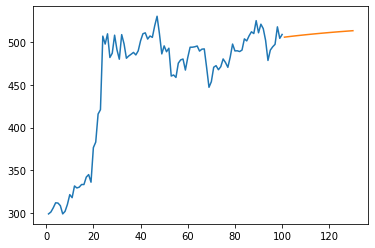

In [76]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[(len(ds_scaled)-100):]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [77]:
ds_new = ds_scaled.tolist()

In [78]:
len(ds_new)

1236

In [79]:
ds_new.extend(lst_output)

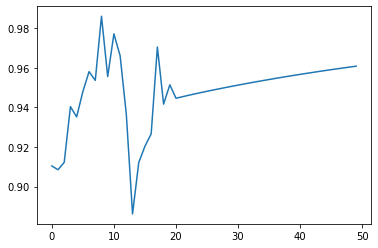

In [80]:
plt.plot(ds_new[(len(ds_new)-50):])

In [81]:
final_graph = normalizer.inverse_transform(ds_new).tolist()

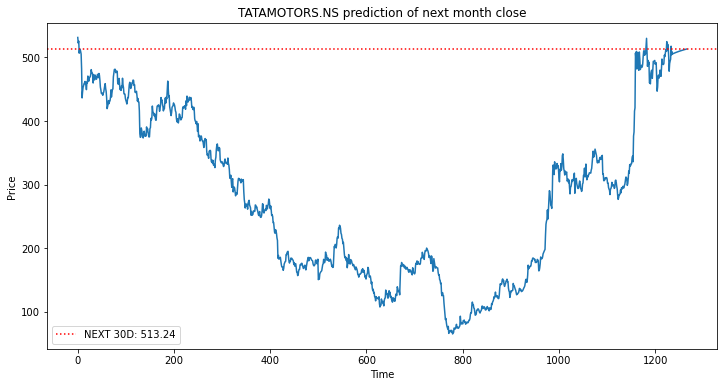

In [82]:
plt.figure(figsize = (12,6))
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month close".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()